<a href="https://colab.research.google.com/github/sdivyakolu/Pytorch_Tutorial/blob/main/AI_Capstone_project__PredictCountryBasedOn_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Model Development Traning ( SOLUTIONING THE PROBLEM : Most important step)

import torch
import torch.nn as nn
import torch.nn.functional as F
#import torchvision.datasets as Country211
import torchvision.transforms as transforms
from torchvision import datasets
import torchvision.models as models
from torch.utils.data import dataloader
from torch.utils.data import random_split
from torch.utils.data import Subset

from torch import optim
import torch.optim as optim

import matplotlib.pyplot as plt

In [28]:
#Define neural network , __init__ and forward functions.
import torch.nn as nn
import torch.nn.functional as F

class CountryRecognition(nn.Module):
    def __init__(self, num_classes=211):
        super(CountryRecognition, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 56 * 56, 512),  # adjust size based on input resolution
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [29]:
#Create model class and initiate it
country=CountryRecognition()
print(country)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
country.to(device)


#Define loss function and Optimizer
#lr=0.4
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(country.parameters(),lr=0.001,momentum=0.9)

CountryRecognition(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=401408, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=211, bias=True)
  )
)


In [33]:
 #Load and trasnform the data

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(std=(0.5,0.5,0.5),
                                                                    mean=(0.5,0.5,0.5))])

train_trasforms=transforms.Compose([ transforms.Resize((224, 224)),
                                    transforms.transforms.ToTensor(),
                                    transforms.Normalize(mean=(0.4914,0.4822,0.4465),
                                                         std=(0.2023,0.1994,0.2010))])

batch_size=32
train_size=4000
val_size=1000

train_data=datasets.Country211(root='./data', download=True,transform=train_trasforms)
test_set=datasets.Country211(root='./data',download=True,transform=train_trasforms)
#train_set, validation_set=random_split(train_data,[train_size,val_size])

# Create subsets
train_sub_data = Subset(train_data, range(train_size))   # First 4000 samples
test_validation_sub_set  = Subset(test_set, range(val_size))    # First 1000 samples

trainloader=torch.utils.data.DataLoader(train_sub_data,batch_size=batch_size,shuffle=True,num_workers=2)

validation_loader=torch.utils.data.DataLoader(test_validation_sub_set,batch_size=batch_size,shuffle=False,num_workers=2)

#Example:Check the length of splits
print("Traning Set Size:",{len(train_sub_data)})
print("Validation Set Size:",{len(test_validation_sub_set)})


testloader=torch.utils.data.DataLoader(test_validation_sub_set,batch_size=batch_size,shuffle=False,num_workers=2)
num_classes = len(train_sub_data.dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Traning Set Size: {4000}
Validation Set Size: {1000}


In [1]:
#Train the network/Model
epochs=10
for epoch in range(epochs):
    country.train() #set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(trainloader):

        #get the inputs, data is a triple of [inputs,labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) # Move data to device
        #zero the parameter gradiant
        optimizer.zero_grad()
        #farward + backward = optimize
        outputs = country(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #Print Statstics
        running_loss += loss.item()

    # Validation after epoch
    #set the model to evaluation mode for validation
    country.eval()
    validation_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device) # Move data to device
            outputs = country(images)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}: Train Loss = {running_loss/len(trainloader):.4f}, "
          f"Val Loss = {validation_loss/len(testloader):.4f}, "
          f"Accuracy = {100*correct/total:.2f}%")

print('Fininsh Traning')

NameError: name 'country' is not defined

In [ ]:
#Evaluate on Test Data

correct = 0
total = 0
with torch.no_grad():
    # Use a DataLoader for the test subset
    test_subset_loader = torch.utils.data.DataLoader(test_validation_sub_set, batch_size=batch_size, shuffle=False, num_workers=2)
    for data in test_subset_loader:
        images, labels = data
        outputs = country(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Removed print statements inside the loop to avoid excessive output
        # print(f"Predicted: {predicted}, Actual: {labels}")
        # print(f"Total: {total}, Correct: {correct}")
        # print(f"Accuracy: {100 * correct / total:.2f}%")

print(f"Accuracy on test images: {100 * correct / total:.2f}%")

Accuracy on test images: 39.20%


In [ ]:
# Define the classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#airplane ✈️
#automobile 🚗
#bird 🐦
#cat 🐱
#deer 🦌
#dog 🐶
#frog 🐸
#horse 🐴
#ship 🚢
#truck 🚚

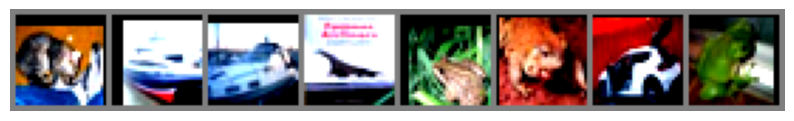

Predicted: frog ship ship ship deer frog car deer
Actual:    cat ship ship plane frog frog car frog


In [ ]:
#Visualize Sample Predictions

import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Get a batch of test images using a DataLoader
test_subset_loader = torch.utils.data.DataLoader(test_validation_sub_set, batch_size=8, shuffle=False, num_workers=2)
dataiter = iter(test_subset_loader)
images, labels = next(dataiter)

# Predict
outputs = country(images)
_, predicted = torch.max(outputs, 1)

# Show images with predicted and true labels
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

imshow(torchvision.utils.make_grid(images[:8]))
print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(8)))
print('Actual:   ', ' '.join(f'{classes[labels[j]]}' for j in range(8)))

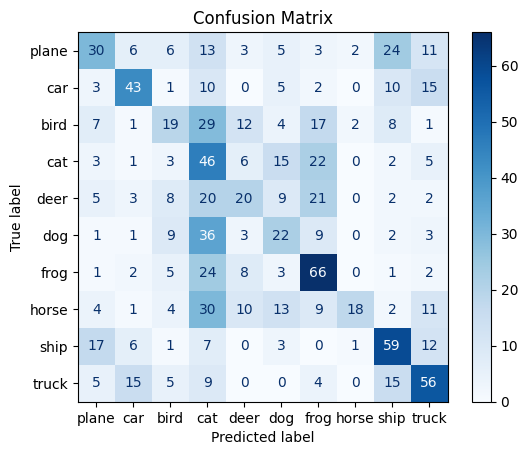

In [ ]:
#Plot a Confusion/Heat Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import torch

# Gather all predictions and true labels
all_preds = []
all_labels = []

# Use a DataLoader for the test subset
test_subset_loader = torch.utils.data.DataLoader(test_validation_sub_set, batch_size=batch_size, shuffle=False, num_workers=2)

with torch.no_grad():
    for data in test_subset_loader:
        images, labels = data
        outputs = country(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()